In [8]:
!git config --global credential.helper store

In [1]:
import os

import requests
import torch
from dotenv import load_dotenv
from PIL import Image
from transformers import MllamaForConditionalGeneration, AutoProcessor, GenerationConfig
from huggingface_hub import notebook_login

In [9]:
notebook_login()

In [2]:
model_id = "meta-llama/Llama-3.2-11B-Vision-Instruct"

model = MllamaForConditionalGeneration.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)
processor = AutoProcessor.from_pretrained(model_id)

The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
def infer(
    model,
    processor,
    message_txt,
    image,
    max_new_tokens=30,
    generation_config=GenerationConfig(do_sample=False)
):
    messages = [
    {"role": "user", "content": [
            {"type": "image"},
            {"type": "text", "text": message_txt}
        ]}
    ]
    input_text = processor.apply_chat_template(messages, add_generation_prompt=True)
    inputs = processor(
        image,
        input_text,
        add_special_tokens=False,
        return_tensors="pt"
    ).to(model.device)
    output = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        generation_config=generation_config
    )
    return processor.decode(output[0])

## 一蘭ラーメン

- 正解はしている模様

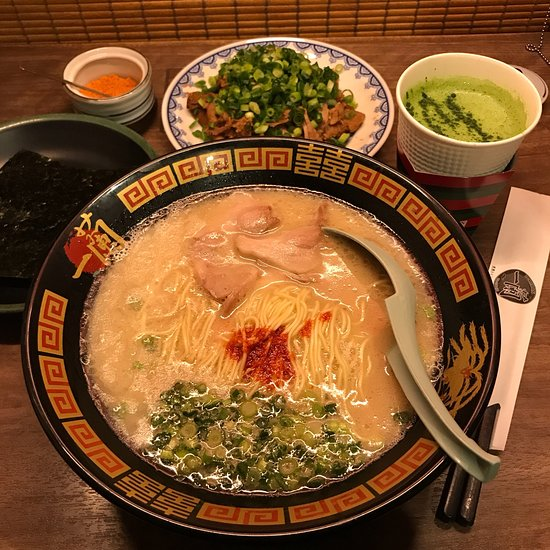

<|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>What’s the name of the restaurant?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

The name of the restaurant is not visible in the image, but the bowl of ramen appears to be from a restaurant called "Ichiran," which is a popular Japanese ramen chain known for its tonkotsu (pork bone) broth and individualized serving style.<|eot_id|>


In [4]:
url = 'https://media-cdn.tripadvisor.com/media/photo-p/12/67/49/e2/photo7jpg.jpg'
image = Image.open(requests.get(url, stream=True).raw)

output = infer(
    model,
    processor,
    'What’s the name of the restaurant?',
    image,
    max_new_tokens=200
)
display(image)
print(output)

## 冷蔵庫
- きちんとイチゴ味のヨーグルトが存在しないことを理解している
- ブルーベリーのヨーグルトがあることも理解している模様

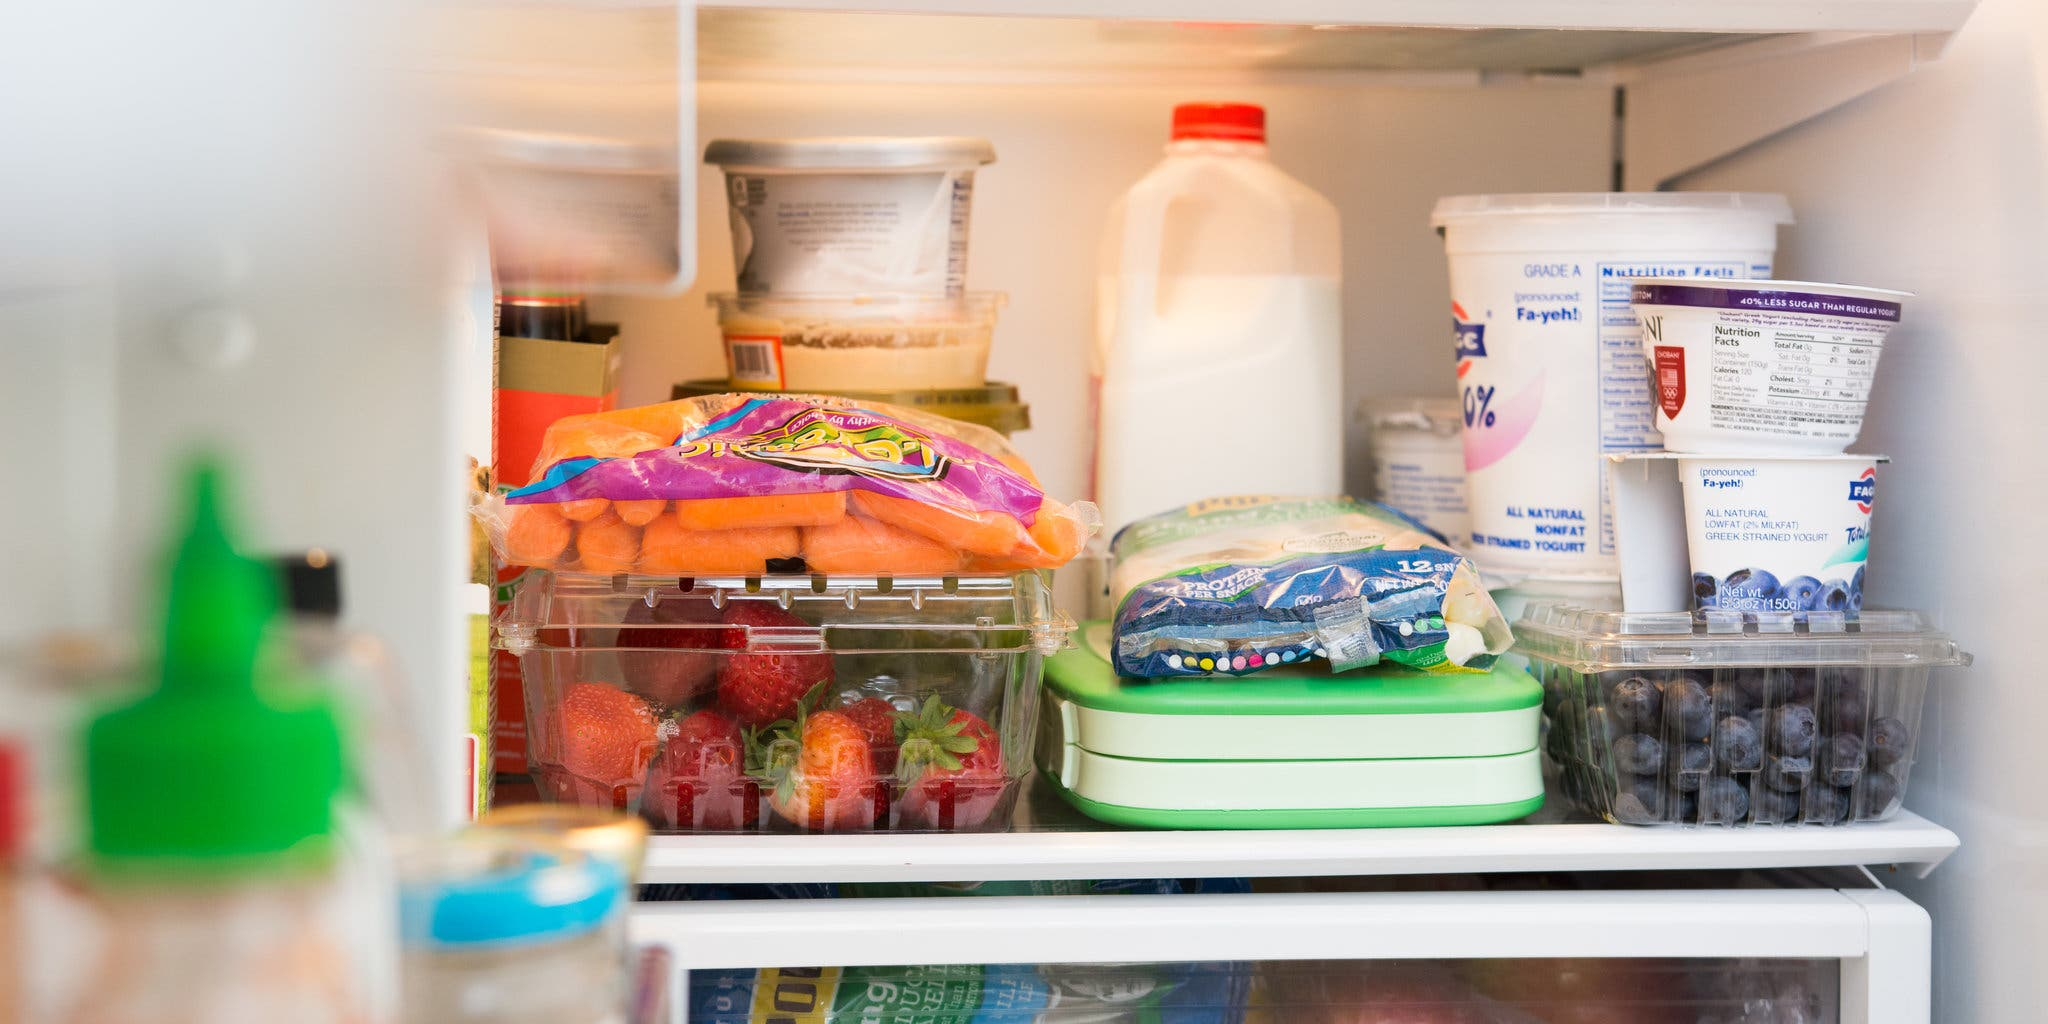

<|begin_of_text|><|start_header_id|>user<|end_header_id|>

<|image|>Is there strawberry-flavored yogurt in the fridge?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

There is a container of blueberry-flavored yogurt in the fridge, but no strawberry-flavored yogurt is visible.<|eot_id|>


In [5]:
url = "https://static01.nyt.com/images/2020/01/23/smarter-living/23help/00wc-fridge-superJumbo.jpg?quality=75&auto=webp"
image = Image.open(requests.get(url, stream=True).raw)

output = infer(
    model,
    processor,
    'Is there strawberry-flavored yogurt in the fridge?',
    image,
    max_new_tokens=200
)
display(image)
print(output)